In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
print('Rows ---->',df.shape[0])
print('column --->',df.shape[1])

Rows ----> 200
column ---> 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [6]:
df.size

1000

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df[:2]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [11]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


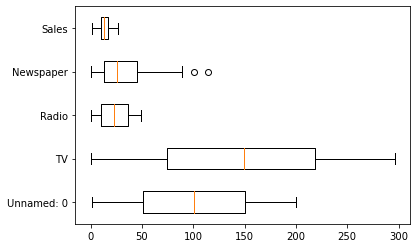

In [12]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

from the above boxplot it is clear that Newspaper column has the outliers but as per problem statement these outliers may play very important role for the prediction of future sales so i decide not to remove it.

In [13]:
df[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


's'

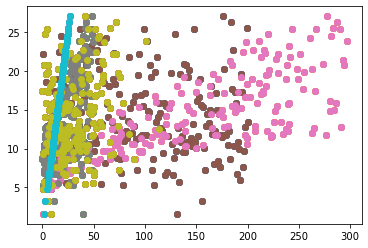

In [14]:
def sc():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 's'
sc()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

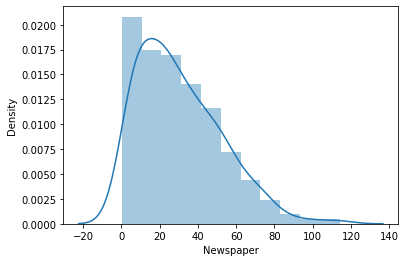

In [15]:
sns.distplot(df['Newspaper'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Radio', ylabel='Density'>

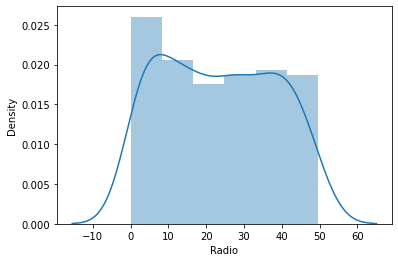

In [16]:
sns.distplot(df['Radio'])

In [17]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [18]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y = df.iloc[:,-1:]

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

In [21]:
xtrain,ytrain

(        TV  Radio  Newspaper
 71   109.8   14.3       31.7
 90   134.3    4.9        9.3
 100  222.4    4.3       49.8
 44    25.1   25.7       43.3
 94   107.4   14.0       10.9
 ..     ...    ...        ...
 58   210.8   49.6       37.7
 21   237.4    5.1       23.5
 49    66.9   11.7       36.8
 64   131.1   42.8       28.9
 68   237.4   27.5       11.0
 
 [140 rows x 3 columns],
      Sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [22]:
xtest,ytest

(        TV  Radio  Newspaper
 56     7.3   28.1       41.4
 37    74.7   49.4       45.7
 67   139.3   14.5       10.2
 79   116.0    7.7       23.1
 80    76.4   26.7       22.3
 188  286.0   13.9        3.7
 183  287.6   43.0       71.8
 10    66.1    5.8       24.2
 128  220.3   49.0        3.2
 62   239.3   15.5       27.3
 65    69.0    9.3        0.9
 17   281.4   39.6       55.8
 133  219.8   33.5       45.1
 195   38.2    3.7       13.8
 146  240.1    7.3        8.7
 38    43.1   26.7       35.1
 173  168.4    7.1       12.8
 149   44.7   25.8       20.6
 93   250.9   36.5       72.3
 29    70.6   16.0       40.8
 0    230.1   37.8       69.2
 2     17.2   45.9       69.3
 122  224.0    2.4       15.6
 180  156.6    2.6        8.3
 95   163.3   31.6       52.9
 121   18.8   21.7       50.4
 185  205.0   45.1       19.6
 39   228.0   37.7       32.0
 66    31.5   24.6        2.2
 19   147.3   23.9       19.1
 11   214.7   24.0        4.0
 45   175.1   22.5       31.5
 41   177.

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [24]:
model.fit(xtrain,ytrain)

LinearRegression()

In [25]:
ypred=model.predict(xtest)
ypred

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [26]:
model.score(xtrain,ytrain)*100

88.44142326775768

In [27]:
model.score(xtest,ytest)*100

92.20854203535252

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
mean_squared_error(ytest,ypred)

2.2412862530933477

In [30]:
mean_absolute_error(ytest,ypred)

1.22122993808994

In [31]:
r2_score(ytest,ypred)*100

92.20854203535252

In [32]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

1.497092600039606

In [33]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [34]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [35]:
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

0.8910650514774895

In [36]:
param_grid = {'normalize':['deprecated'],
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }

In [37]:
grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [38]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [39]:
grid_model.estimator

LinearRegression()

In [40]:
grid_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_jobs': -1,
 'param_grid': {'normalize': ['deprecated'],
  'copy_X': [True],
  'n_jobs': [-1, 1, 2, -2],
  'positive': [False],
  'fit_intercept': [True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [41]:
grid_model.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': 'deprecated',
 'positive': False}

In [42]:
grid_model.best_score_

0.8686758831118258

# Ridge

In [43]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression(fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    n_jobs=-1,
    positive=False)

In [44]:
model.fit(xtrain,ytrain)
model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)

0.9220854203535253

In [45]:
ridgemodel =Ridge()
ridgemodel

Ridge()

In [46]:
param_ridge={
    'alpha' :[1.0,0.01,2,3,0.05,0.07,0.09,0.1,0.3,0.6,0.9],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,10000,13000,15000],
    'tol':[0.001,0.004,0.002,0.003],
    'solver':['auto','saga'],
    'positive':[True],
    'random_state':[0]
}

In [47]:
ridge_model=GridSearchCV(ridgemodel,
    param_grid=param_ridge,
    cv=5)
ridge_model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'normalize': ['deprecated'], 'positive': [True],
                         'random_state': [0], 'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [48]:
ridge_model.fit(xtrain,ytrain)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1320 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py", 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'normalize': ['deprecated'], 'positive': [True],
                         'random_state': [0], 'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [49]:
ridgepred = ridge_model.predict(xtest)

In [50]:
ridge_model.score(xtrain,ytrain)

0.8843476252344077

In [51]:
ridge_model.score(xtest,ytest)

0.922305942154056

# Lasso

In [52]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9204771495691686

In [53]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [54]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [55]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'normalize': ['deprecated'],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [56]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [57]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.9204771495691686